<a href="https://colab.research.google.com/github/aaolcay/Convolutional-Neural-Network-Examples/blob/main/VGG16_ImageNet_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Import Libraries**

`os`: for the interacting with the operating system (call the paths and access them)

`numpy`: enables using arrays

`PIL.Image`: Python image library, we use it for opening the images loaded into our folder to make prediction

`keras.applications.vgg16.VGG16`: VGG16 model we use in this example

In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.applications.vgg16 import VGG16

###**Transfer Learning**

We use `VGG16` pre-trained for `ImageNet` dataset as a model.

`include_top=True` means, here, including 3 fully connected layers at the top of the network.

For more information: [click here](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16)

In [63]:
model = VGG16(weights='imagenet', include_top=True)

####**Model**

See which layers we have in our model.

In [64]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

As seen we have a very complex Deep Neural Network that we need a couple of hours to build using Keras API or Sequential Model techniques. The good news is that we can use this model without compiling and training as it has been already trained with millions of images (using ImageNet dataset). Otherwise, training a model built would put our personal computers in trouble. 

In [65]:
# See the optimizer used in VGG16
print(model.optimizer)

None


In [66]:
# See the layers' names with the activation functions (if it is present)
for layer in model.layers:
  print(f"Layer name -> {layer.name}")
  print(f"Layer output -> {layer.output}")

Layer name -> input_4
Layer output -> KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")
Layer name -> block1_conv1
Layer output -> KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 64), dtype=tf.float32, name=None), name='block1_conv1/Relu:0', description="created by layer 'block1_conv1'")
Layer name -> block1_conv2
Layer output -> KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 64), dtype=tf.float32, name=None), name='block1_conv2/Relu:0', description="created by layer 'block1_conv2'")
Layer name -> block1_pool
Layer output -> KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 64), dtype=tf.float32, name=None), name='block1_pool/MaxPool:0', description="created by layer 'block1_pool'")
Layer name -> block2_conv1
Layer output -> KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 128), dtype=tf.float32, name=None), name='block2_conv1/Relu:0', description="create

###**Load Data**

We upload a humpback whale image (resource: https://wwfwhales.org/news-stories/troubled-waters-ahead-on-australias-humpback-highway).

###**Connect this GoogleColab with our Google Drive**

In [67]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [68]:
os.chdir('/gdrive/My Drive/Convolutional Neural Networks')
!ls

Fashion_mnist_KerasAPI_model.ipynb
Fashion_mnist_Transfer_Learning.ipynb
Great_White_Shark_WWF_Carlos_Aguilera.jpg
Humpback_whale.jpg
mnist_dataset_Sequential_model.ipynb
model_fashion-mnist_cnn_train2_epoch24.h5
VGG16_ImageNet.ipynb


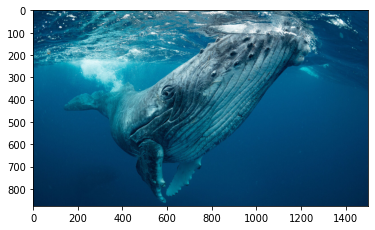

In [69]:
image_path = 'Humpback_whale.jpg'
image_hw = Image.open(image_path)
plt.imshow(image_hw)

This is really important to know what is the required size for input data. Therefore, we need to know what our model needs

In [70]:
model.layers[0].output_shape[0]

(None, 224, 224, 3)

We need to have an input image with the size of 224(H)x224(W), where H stands for height and W for width, and 3 channels (RGB, Red-Green-Blue, image). However, let's check that our image's size.

In [71]:
image_hw.size

(1500, 876)

Our image has 876 height and 1500 width and needs to be resized.

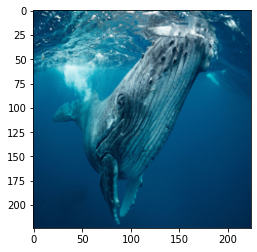

In [72]:
image_hw_rs = image_hw.resize((224,224))
plt.imshow(image_hw_rs)

Convert this image into an array to make it suitable for entering to model.

In [73]:
X = np.array(image_hw_rs, dtype='float32') # convert this image into an array

In [74]:
X.shape

(224, 224, 3)

In [75]:
X = X[np.newaxis,...]
X.shape

(1, 224, 224, 3)

Preprocess this data by using VGG16's pre-processing technique

In [76]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

a = preprocess_input(X)

In [77]:
predictions = model.predict(a)

1/1 [==============================] - 1s 1s/step


In [78]:
print(f'Predicted most probable 5 things: {decode_predictions(predictions, top=5)[0]}')

Predicted most probable 5 things: [('n01484850', 'great_white_shark', 0.7298445), ('n01665541', 'leatherback_turtle', 0.14008243), ('n02066245', 'grey_whale', 0.040887013), ('n01664065', 'loggerhead', 0.028320553), ('n01491361', 'tiger_shark', 0.026450958)]


VGG16 says (by using ImageNet dataset) this humpback whale is a great white shark with the probability of 0.7298445.